In [28]:
import spacy
nlp = spacy.load("en_core_web_md")

# Core Pkgs
import streamlit as st
from collections import Counter

# EDA Pkgs
import pandas as pd 
import numpy as np 
from datetime import datetime

# Vizualization Package 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from PIL import Image

# In-built Class
from get_sentiments import *
from get_emotions   import *
from data_pre_process import *
from utils import *

In [55]:
review_df = pd.read_csv('./data/Scraped_Car_Review_porsche.csv')
display(review_df.shape)
display(review_df.columns)
review_df.head()

(2429, 6)

Index(['Review_Date', 'Author_Name', 'Vehicle_Title', 'Review_Title', 'Review',
       'Rating'],
      dtype='object')

,Review_Date,Author_Name,Vehicle_Title,Review_Title,Review,Rating
0,on 08/28/18 13:31 PM (PDT),Chris,2015 Porsche Macan SUV Turbo 4dr SUV AWD (3.6L...,Porsche Macan is a Beast,I owned a Porsche Cayenne for two years and e...,5.0
1,on 06/17/18 17:30 PM (PDT),Phil Fair,2015 Porsche Macan SUV S 4dr SUV AWD (3.0L 6cy...,Outstanding ride!,"Love my 2015 Porsche Macan S SUV, but please ...",5.0
2,on 05/16/18 11:27 AM (PDT),Steven,2015 Porsche Macan SUV S 4dr SUV AWD (3.0L 6cy...,Pretty and comfy,Great looking vehicle with the most comfortab...,4.0
3,on 05/15/18 19:22 PM (PDT),Zw,2015 Porsche Macan SUV S 4dr SUV AWD (3.0L 6cy...,"Once you've gone Porsche, it's hard to go back",Crossover that drives like a Porsche- I outgr...,5.0
4,on 11/11/17 07:20 AM (PST),george toccalino,2015 Porsche Macan SUV Turbo 4dr SUV AWD (3.6L...,The 911 SUV,Fun to drive SUV:very close to handling like ...,5.0


In [56]:
review_df = review_df[['Vehicle_Title', 'Review_Title', 'Review', 'Rating']]
review_df.head()

,Vehicle_Title,Review_Title,Review,Rating
0,2015 Porsche Macan SUV Turbo 4dr SUV AWD (3.6L...,Porsche Macan is a Beast,I owned a Porsche Cayenne for two years and e...,5.0
1,2015 Porsche Macan SUV S 4dr SUV AWD (3.0L 6cy...,Outstanding ride!,"Love my 2015 Porsche Macan S SUV, but please ...",5.0
2,2015 Porsche Macan SUV S 4dr SUV AWD (3.0L 6cy...,Pretty and comfy,Great looking vehicle with the most comfortab...,4.0
3,2015 Porsche Macan SUV S 4dr SUV AWD (3.0L 6cy...,"Once you've gone Porsche, it's hard to go back",Crossover that drives like a Porsche- I outgr...,5.0
4,2015 Porsche Macan SUV Turbo 4dr SUV AWD (3.6L...,The 911 SUV,Fun to drive SUV:very close to handling like ...,5.0


In [22]:
df.isna().sum()

Vehicle_Title    645
Review_Title     645
Review           645
Rating           802
dtype: int64

In [23]:
df = df.dropna()

In [43]:
df['Rating'] = np.round(df['Rating'], 0)
df['Rating'] = df['Rating'].astype('int')

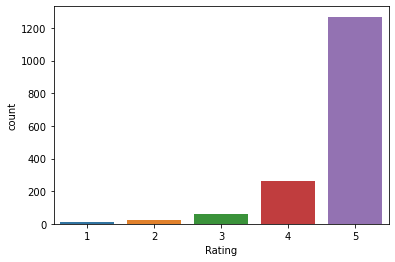

In [44]:
ax = sns.countplot(x="Rating", data=df)

In [53]:
df['Rating'].value_counts()

5    1269
4     264
3      59
2      24
1      11
Name: Rating, dtype: int64

In [45]:
def get_vehicle_name(full_veh_description):
    veh_desc_list = full_veh_description.split(' ')
    return ' '.join(veh_desc_list[0:4])

In [46]:
df['Vehicle_Name'] = df['Vehicle_Title'].apply(lambda x:get_vehicle_name(x))

In [47]:
df.head()

,Vehicle_Title,Review_Title,Review,Rating,Vehicle_Name
0,2015 Porsche Macan SUV Turbo 4dr SUV AWD (3.6L...,Porsche Macan is a Beast,I owned a Porsche Cayenne for two years and e...,5,2015 Porsche Macan SUV
1,2015 Porsche Macan SUV S 4dr SUV AWD (3.0L 6cy...,Outstanding ride!,"Love my 2015 Porsche Macan S SUV, but please ...",5,2015 Porsche Macan SUV
2,2015 Porsche Macan SUV S 4dr SUV AWD (3.0L 6cy...,Pretty and comfy,Great looking vehicle with the most comfortab...,4,2015 Porsche Macan SUV
3,2015 Porsche Macan SUV S 4dr SUV AWD (3.0L 6cy...,"Once you've gone Porsche, it's hard to go back",Crossover that drives like a Porsche- I outgr...,5,2015 Porsche Macan SUV
4,2015 Porsche Macan SUV Turbo 4dr SUV AWD (3.6L...,The 911 SUV,Fun to drive SUV:very close to handling like ...,5,2015 Porsche Macan SUV


In [52]:
df[(df.Rating==1)|(df.Rating==2)]['Vehicle_Name'].value_counts()

2006 Porsche Cayenne SUV            4
2005 Porsche Cayenne SUV            3
2017 Porsche Macan SUV              3
2014 Porsche 911 Coupe              2
2016 Porsche Cayenne SUV            2
2016 Porsche Cayman Coupe           2
2004 Porsche Cayenne SUV            2
2009 Porsche 911 Convertible        1
2008 Porsche Cayman Coupe           1
2011 Porsche Panamera Sedan         1
2006 Porsche Boxster Convertible    1
2002 Porsche Boxster Convertible    1
2016 Porsche Cayenne Hybrid         1
2010 Porsche Panamera Sedan         1
2005 Porsche Carrera GT             1
2003 Porsche 911 Coupe              1
2014 Porsche Panamera Sedan         1
2008 Porsche 911 GT2                1
2003 Porsche Cayenne SUV            1
2012 Porsche Panamera Sedan         1
2015 Porsche 911 Coupe              1
2018 Porsche Panamera Sedan         1
2017 Porsche Cayenne SUV            1
2007 Porsche 911 Convertible        1
Name: Vehicle_Name, dtype: int64